# Certified AI Practitioner Week 01 Call 01 - Intro to AI/ML

## Learning Objectives

- Understand differences between AI, ML, DL, and GenAI
- Identify types of ML (supervised vs unsupervised)
- Recognize underfitting and overfitting
- Understand the ML lifecycle
- Build and evaluate a simple ML model

## AI vs ML vs DL vs GenAI 

<img src="8f6e892e-2ece-4de1-82b0-0144dcf47ac6.png" alt="image" width="60%"/>

### Example: Email Management System

| Concept      | Definition                                                                 | Real-World Example                                                  |
|--------------|------------------------------------------------------------------------------|----------------------------------------------------------------------|
| **AI**       | Any system that mimics human intelligence                                   | Filters spam emails and flags suspicious messages                   |
| **ML**       | A subset of AI that learns from data                                        | Learns to classify emails as spam or not based on past examples     |
| **DL**       | A subset of ML that uses neural networks                                    | Uses a neural network to analyze email content and detect phishing  |
| **GenAI**    | A subset of DL that generates content based on input                        | Automatically drafts email replies in your writing style            |


## Supervised vs. Unsupervised Learning

### Supervised Learning
- We train the model using **labeled data** (features + known outcomes).
- The goal is to **predict a target** (like a category or number).
- Example: Predict if a loan will be approved based on income and credit score.

### Unsupervised Learning
- We train the model using **unlabeled data** (only features, no known outcome).
- The goal is to **find patterns or structure** (like groups or anomalies).
- Example: Group customers based on transaction behavior without knowing what groups exist in advance.

---

### Quick Tip:
> If you’re **predicting a value**, it’s supervised.  
> If you’re just **exploring the data**, it’s unsupervised.


In [3]:
!pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 8.9/8.9 MB 46.3 MB/s  0:00:00
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ------------ --------------------------- 11.8/38.6 MB 56.8 MB/s eta 0:00:01
   ------------------------------ --------- 29.4/38.6 MB 71.7 MB/s eta 0:00:01
   ------------------------------ --------- 29.4/38.6 MB 71.7 MB/s eta 0:00:01
   ---------------------------------------  38.5/38.6 MB 48.0 MB/s eta 0:00:01
   ---------------------------------------- 38.6/38.6 MB 43.1 MB/s  0:00:00
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- -----------------------------

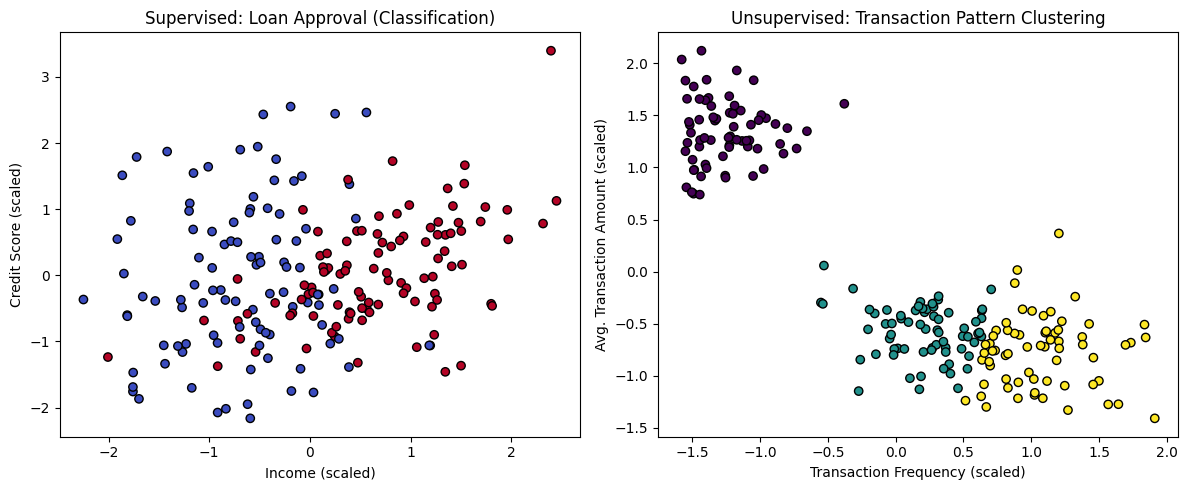

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generate supervised data (Loan Approval)
X_class, y_class = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                                       n_clusters_per_class=1, n_classes=2, random_state=42)
scaler_class = StandardScaler()
X_class_scaled = scaler_class.fit_transform(X_class)

# Train logistic regression model
clf = LogisticRegression()
clf.fit(X_class_scaled, y_class)

# Generate unsupervised data (Transaction Patterns)
X_unsup, _ = make_blobs(n_samples=200, centers=3, n_features=2, random_state=42)
X_unsup[:, 0] = np.abs(X_unsup[:, 0] * 5 + 10)   # transaction_frequency
X_unsup[:, 1] = np.abs(X_unsup[:, 1] * 50 + 100) # avg_transaction_amount

scaler_unsup = StandardScaler()
X_unsup_scaled = scaler_unsup.fit_transform(X_unsup)

# Cluster using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
y_cluster = kmeans.fit_predict(X_unsup_scaled)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Supervised: Loan Approval
axes[0].scatter(X_class_scaled[:, 0], X_class_scaled[:, 1], c=y_class, cmap='coolwarm', edgecolor='k')
axes[0].set_title("Supervised: Loan Approval (Classification)")
axes[0].set_xlabel("Income (scaled)")
axes[0].set_ylabel("Credit Score (scaled)")

# Unsupervised: Transaction Clustering
axes[1].scatter(X_unsup_scaled[:, 0], X_unsup_scaled[:, 1], c=y_cluster, cmap='viridis', edgecolor='k')
axes[1].set_title("Unsupervised: Transaction Pattern Clustering")
axes[1].set_xlabel("Transaction Frequency (scaled)")
axes[1].set_ylabel("Avg. Transaction Amount (scaled)")

plt.tight_layout()
plt.show()


## Regression vs Classification (Both are Supervised Learning)

Within supervised learning, there are two main types of problems:

---

### Classification
- Goal: Predict a **category or label**
- Output: **Discrete** value (e.g., "spam" or "not spam")
- Examples:
  - Is this email spam?
  - Will the passenger survive?
  - What digit is in the image?

---

### Regression
- Goal: Predict a **number or quantity**
- Output: **Continuous** value (e.g., 152.3)
- Examples:
  - What will the temperature be tomorrow?
  - How much will the house sell for?
  - How many items will be sold next week?

---

### Quick Tip to Tell the Difference

Ask yourself:
> “Am I predicting a **number** or a **label**?”

- Number → **Regression**
- Label → **Classification**

Both are supervised, because we train the model on input/output **pairs**.


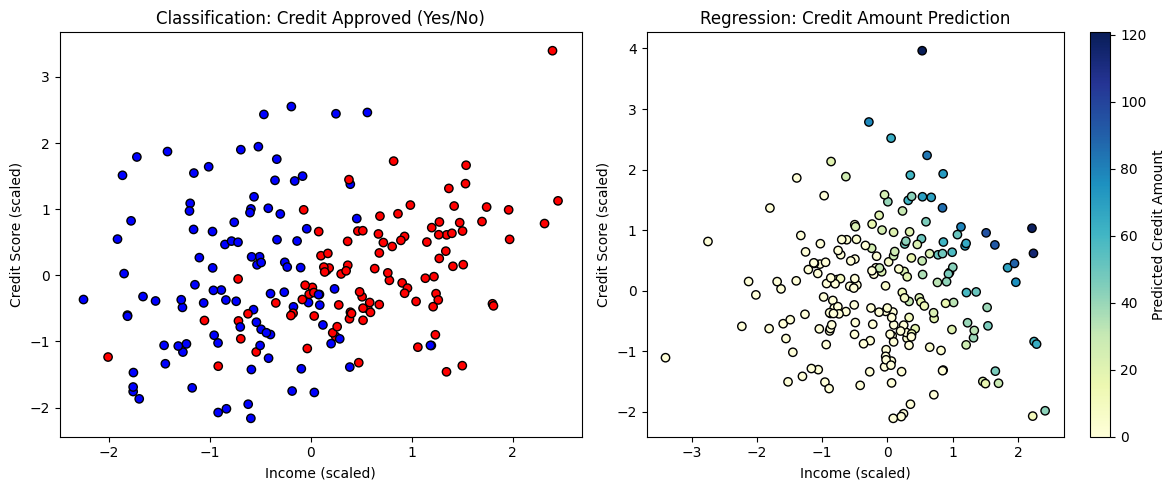

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# --- Classification: Credit Approved (Yes/No) ---
X_class, y_class = make_classification(
    n_samples=200, n_features=2, n_informative=2,
    n_redundant=0, n_clusters_per_class=1, n_classes=2,
    random_state=42
)
scaler_class = StandardScaler()
X_class_scaled = scaler_class.fit_transform(X_class)

clf = LogisticRegression()
clf.fit(X_class_scaled, y_class)

# --- Regression: Credit Amount ---
X_reg, y_reg = make_regression(
    n_samples=200, n_features=2, noise=10, random_state=42
)
y_reg = np.clip(y_reg, 0, None)  # Clip to simulate non-negative credit amounts
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

reg = LinearRegression()
reg.fit(X_reg_scaled, y_reg)
y_pred_reg = reg.predict(X_reg_scaled)

# --- Plotting ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Classification plot
axes[0].scatter(
    X_class_scaled[:, 0], X_class_scaled[:, 1],
    c=y_class, cmap='bwr', edgecolor='k'
)
axes[0].set_title("Classification: Credit Approved (Yes/No)")
axes[0].set_xlabel("Income (scaled)")
axes[0].set_ylabel("Credit Score (scaled)")

# Regression plot
scatter = axes[1].scatter(
    X_reg_scaled[:, 0], X_reg_scaled[:, 1],
    c=y_reg, cmap='YlGnBu', edgecolor='k'
)
axes[1].set_title("Regression: Credit Amount Prediction")
axes[1].set_xlabel("Income (scaled)")
axes[1].set_ylabel("Credit Score (scaled)")

# Add color bar to show prediction scale
cbar = plt.colorbar(scatter, ax=axes[1])
cbar.set_label("Predicted Credit Amount")

plt.tight_layout()
plt.show()


## Underfitting vs Overfitting

### Underfitting (Too Simple)
> Like trying to guess someone's job based only on their shoe size.

- The model is too basic and can't capture the underlying pattern.
- It performs poorly on both training and test data.

---

### Overfitting (Too Complex)
> Like memorizing every detail of your practice test and failing the real one because it’s slightly different.

- The model learns the training data *too well*, including noise.
- It performs well on training data but poorly on new, unseen data.

---

### Balanced Fit (Just Right)
> Like learning the key patterns to recognize a cat in different pictures.

- The model captures the important structure of the data.
- It generalizes well — performing consistently on both training and test data.


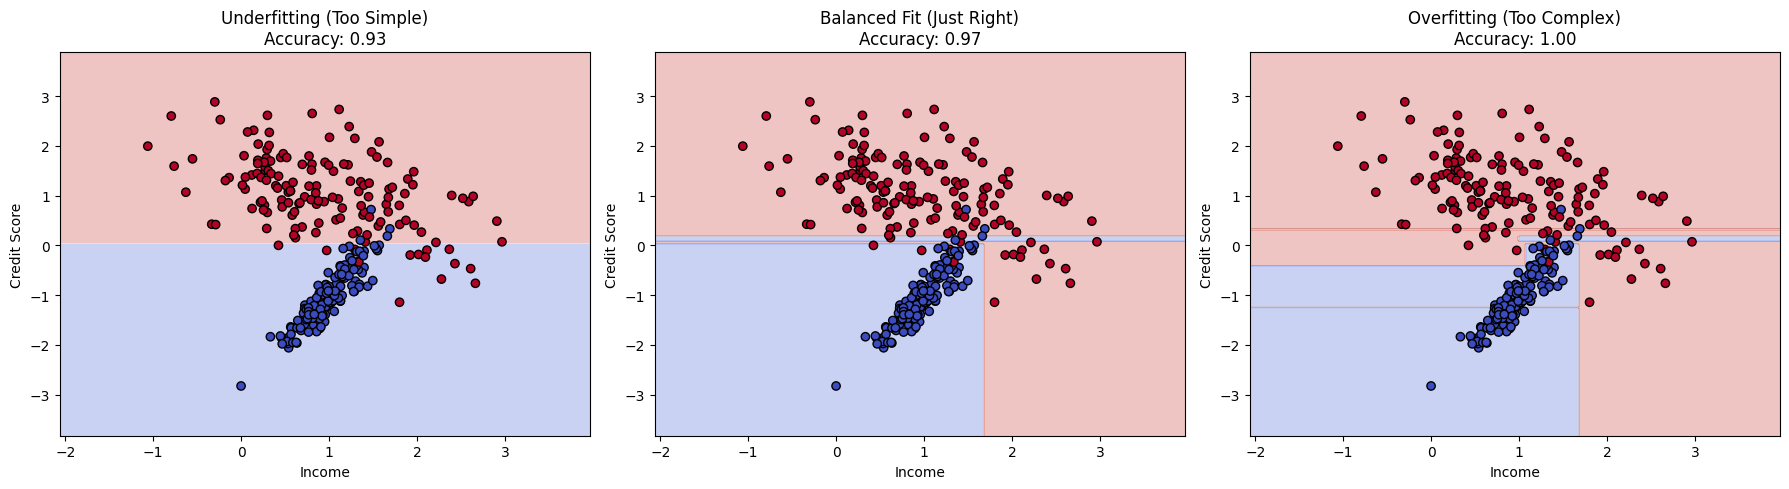

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Create synthetic classification dataset
X, y = make_classification(
    n_samples=300, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, class_sep=1.0, random_state=42
)

# Define models with increasing complexity
models = {
    "Underfitting (Too Simple)": DecisionTreeClassifier(max_depth=1, random_state=42),
    "Balanced Fit (Just Right)": DecisionTreeClassifier(max_depth=3, random_state=42),
    "Overfitting (Too Complex)": DecisionTreeClassifier(max_depth=None, random_state=42)
}

# Set up plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Create mesh grid for decision boundary visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Plot decision surfaces and scatter plots
for ax, (title, model) in zip(axes, models.items()):
    model.fit(X, y)
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)

    # Decision boundary
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    # Data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    ax.set_title(f"{title}\nAccuracy: {acc:.2f}")
    ax.set_xlabel("Income")
    ax.set_ylabel("Credit Score")

plt.tight_layout()
plt.show()


## Understanding Class Imbalance

In a **binary classification problem**, class imbalance occurs when one class has **significantly more samples** than the other.

This can cause problems:
- A model can achieve **high accuracy** by always predicting the majority class.
- But it may perform **very poorly** on the minority class — which is often the more important one (e.g., fraud detection, disease diagnosis).

---

### Example

Suppose we are trying to predict whether a transaction is **fraudulent**:

| Class            | Count  |
|------------------|--------|
| Not Fraud (0)    | 950    |
| Fraud (1)        | 50     |

A model that always predicts **"Not Fraud"** would be 95% accurate but completely useless because it detects fraud 0%!


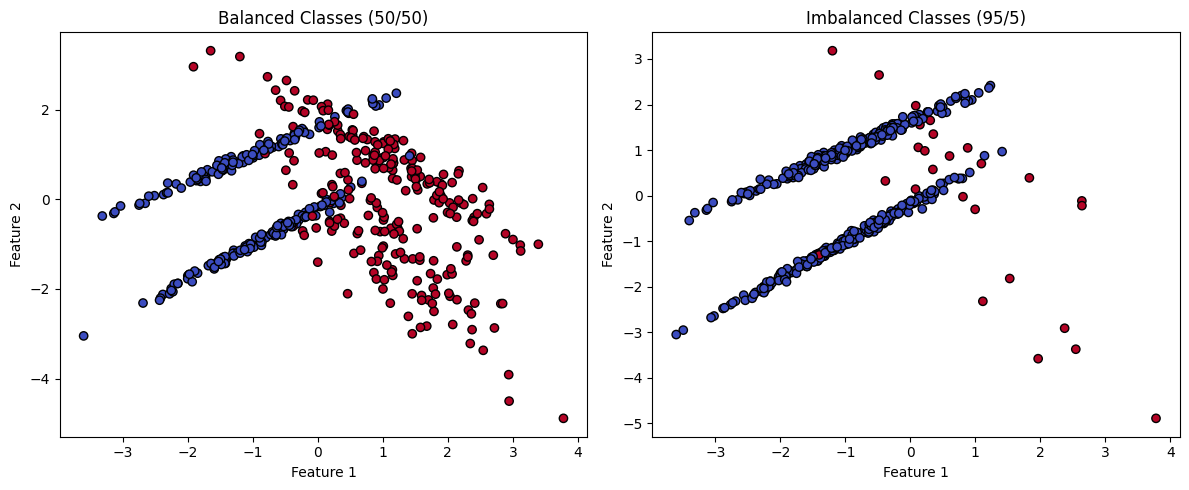

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate balanced dataset (50/50)
X_balanced, y_balanced = make_classification(
    n_samples=500, n_features=2, n_informative=2, n_redundant=0,
    weights=[0.5, 0.5], random_state=42
)

# Generate imbalanced dataset (95/5)
X_imbalanced, y_imbalanced = make_classification(
    n_samples=500, n_features=2, n_informative=2, n_redundant=0,
    weights=[0.95, 0.05], random_state=42
)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Balanced scatter
axes[0].scatter(X_balanced[:, 0], X_balanced[:, 1], c=y_balanced, cmap='coolwarm', edgecolor='k')
axes[0].set_title("Balanced Classes (50/50)")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

# Imbalanced scatter
axes[1].scatter(X_imbalanced[:, 0], X_imbalanced[:, 1], c=y_imbalanced, cmap='coolwarm', edgecolor='k')
axes[1].set_title("Imbalanced Classes (95/5)")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()


## Machine Learning Lifecycle

<img src="9a086f5f-0c18-43ca-92e0-9413c4f3facf.png" alt="image" width="80%"/>

### Prepare

- Load the dataset (e.g., from `sklearn.datasets` or a CSV)
- Explore and clean the data
- Split into features (`X`) and labels (`y`)
- Split into training and test sets using `train_test_split`
- (Optional) Normalize or scale the features using tools like `StandardScaler`

In [9]:
# Step 1: Load necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 2: Load dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Optional: Convert to DataFrame for inspection
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
display(df.head())

# Step 3: Train/test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature scaling (optional but recommended for many models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# You now have:
# - X_train_scaled, y_train → for training
# - X_test_scaled, y_test → for evaluation


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


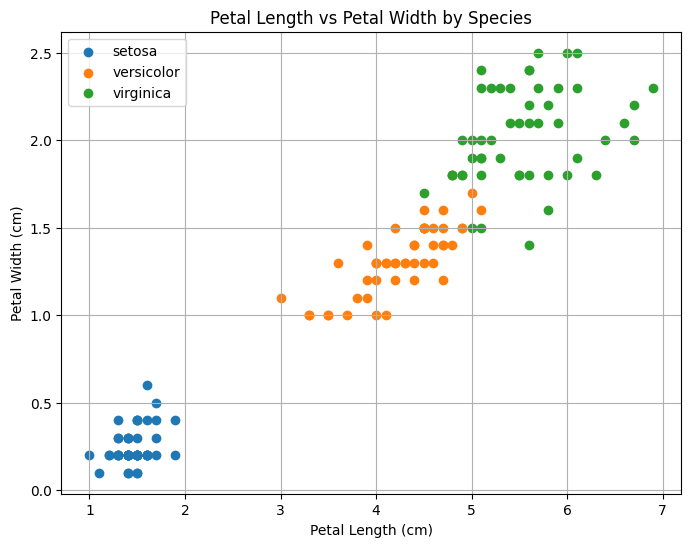

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load and prepare the dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Simple scatter plot of petal features
plt.figure(figsize=(8, 6))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'], label=species)

plt.title("Petal Length vs Petal Width by Species")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend()
plt.grid(True)
plt.show()


### Train

- Choose a model (e.g., `DecisionTreeClassifier`, `LogisticRegression`)
- Fit the model on the training data

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Step 1: Create the model
model = DecisionTreeClassifier(random_state=42)

# Step 2: Fit the model on the training data
model.fit(X_train_scaled, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


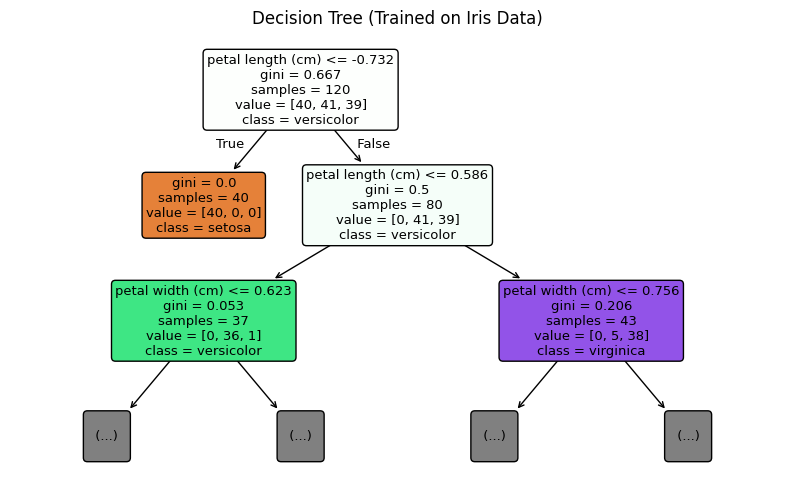

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names,
          filled=True, rounded=True, max_depth=2)
plt.title("Decision Tree (Trained on Iris Data)")
plt.show()


### Predict + Evaluate

- Use `.predict()` to generate predictions on new or test data
- Use `.score()` or metrics like accuracy, precision, recall to evaluate

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



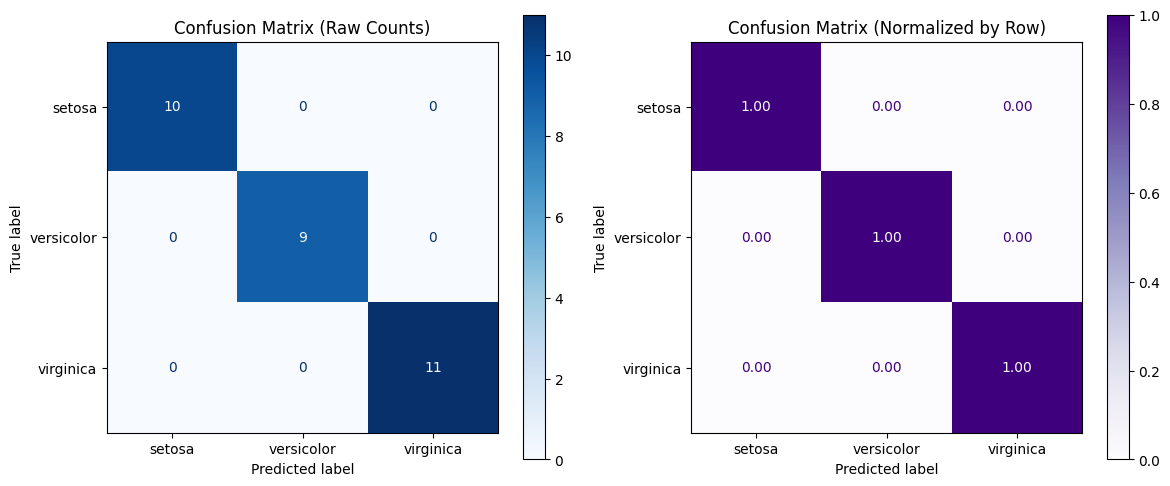

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Step 1: Predict on the test set
X_test_scaled = scaler.transform(X_test)  # Scale test data just like training
y_pred = model.predict(X_test_scaled)

# Step 2: Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Step 3: Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Step 4: Confusion matrices (raw and normalized)
cm_raw = confusion_matrix(y_test, y_pred)
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')

# Step 5: Plot both side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Raw
ConfusionMatrixDisplay(confusion_matrix=cm_raw, display_labels=iris.target_names).plot(
    ax=axes[0], cmap='Blues', values_format='d'
)
axes[0].set_title("Confusion Matrix (Raw Counts)")

# Normalized
ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=iris.target_names).plot(
    ax=axes[1], cmap='Purples', values_format='.2f'
)
axes[1].set_title("Confusion Matrix (Normalized by Row)")

plt.tight_layout()
plt.show()


## What is Feature Importance?

Feature importance tells us **which input features** had the most influence on a model's predictions.

- In **tree-based models** (like Decision Trees or Random Forests), it's calculated based on how often and how effectively a feature is used to split the data.
- A higher score means the feature played a bigger role in decision-making.

---

### Why it matters:
- Helps you **interpret the model** and understand what it’s learning.
- Can guide **feature selection** for simplifying or improving models.
- Useful for **business insight** — reveals what factors drive predictions (e.g., income vs. credit score).



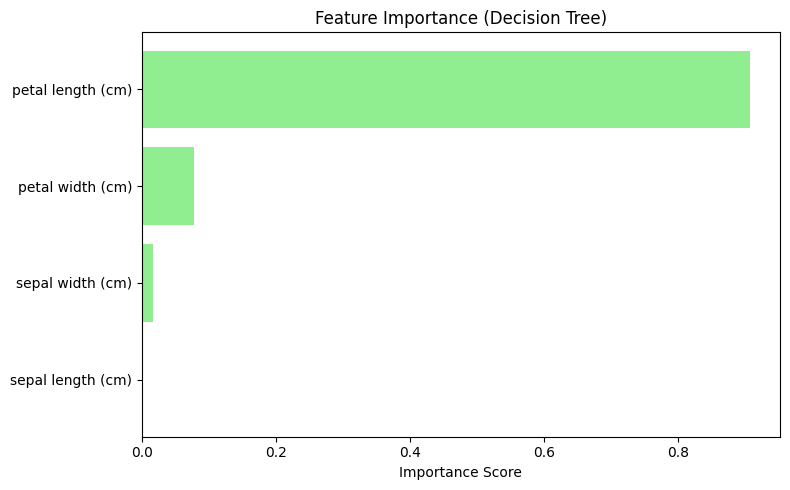

In [19]:
# Create a DataFrame and plot feature importances from model
importance_df = pd.DataFrame({
    "Feature": iris.feature_names,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=True)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="lightgreen")
plt.xlabel("Importance Score")
plt.title("Feature Importance (Decision Tree)")
plt.tight_layout()
plt.show()


## What Happens When We Remove the Most Important Feature?



Classification Report (Most Important Feature Removed):

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.87      1.00      0.93        13
   virginica       1.00      0.85      0.92        13

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



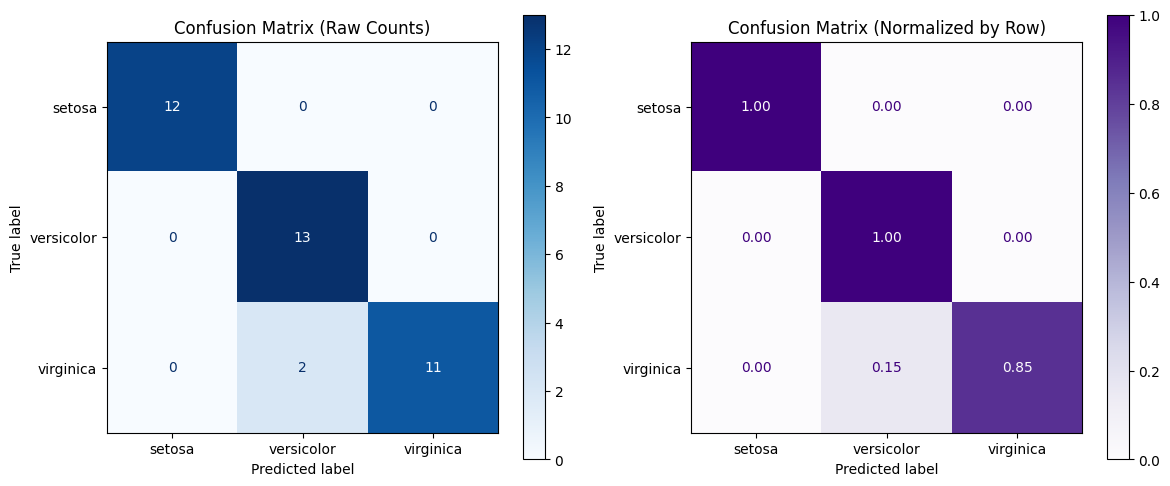

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Identify most important feature from original model
most_important_index = np.argmax(model.feature_importances_)
remaining_indices = [i for i in range(X.shape[1]) if i != most_important_index]

# Step 2: Create reduced feature set
X_reduced = X[:, remaining_indices]
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, random_state=42, stratify=y)

# Step 3: Scale features
scaler_red = StandardScaler()
X_train_red_scaled = scaler_red.fit_transform(X_train_red)
X_test_red_scaled = scaler_red.transform(X_test_red)

# Step 4: Retrain the decision tree
tree_model_reduced = DecisionTreeClassifier(random_state=42)
tree_model_reduced.fit(X_train_red_scaled, y_train_red)

# Step 5: Predict and evaluate
y_pred_red = tree_model_reduced.predict(X_test_red_scaled)

# Evaluation
print("Classification Report (Most Important Feature Removed):\n")
print(classification_report(y_test_red, y_pred_red, target_names=iris.target_names))

# Step 6: Confusion matrices (raw and normalized)
cm_raw_red = confusion_matrix(y_test_red, y_pred_red)
cm_norm_red = confusion_matrix(y_test_red, y_pred_red, normalize='true')

# Step 7: Plot both side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Raw
ConfusionMatrixDisplay(confusion_matrix=cm_raw_red, display_labels=iris.target_names).plot(
    ax=axes[0], cmap='Blues', values_format='d'
)
axes[0].set_title("Confusion Matrix (Raw Counts)")

# Normalized
ConfusionMatrixDisplay(confusion_matrix=cm_norm_red, display_labels=iris.target_names).plot(
    ax=axes[1], cmap='Purples', values_format='.2f'
)
axes[1].set_title("Confusion Matrix (Normalized by Row)")

plt.tight_layout()
plt.show()


## Wrap-Up & Takeaways 

- What machine learning actually means
- How different types of models learn
- Why some models fail by doing too little or too much
- How to train a very simple model end-to-end